## Ejercicios API Frankfurter

In [7]:
import numpy as np
import pandas as pd
import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import requests

from pprint import pprint

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"sns=={sns.__version__}")
print(f"requests=={requests.__version__}")

numpy==1.26.4
pandas==2.2.2
matplotlib==3.10.0
sns==0.13.2
requests==2.32.3


### Ejercicio 1:

- Definir una función que tome como parámetro un año y una moneda diferente del euro y que muestre la relación entre el euro y la otra moneda en ese año. En la gráfica se debe marcar el máximo y el mínimo. Imprime los endpoints que utilizados para extraer la información.

Endpoint: https://api.frankfurter.app/2021-01-01..2021-12-31?to=USD
Máximo: 1.2338 el 2021-01-06
Mínimo: 1.1206 el 2021-11-24


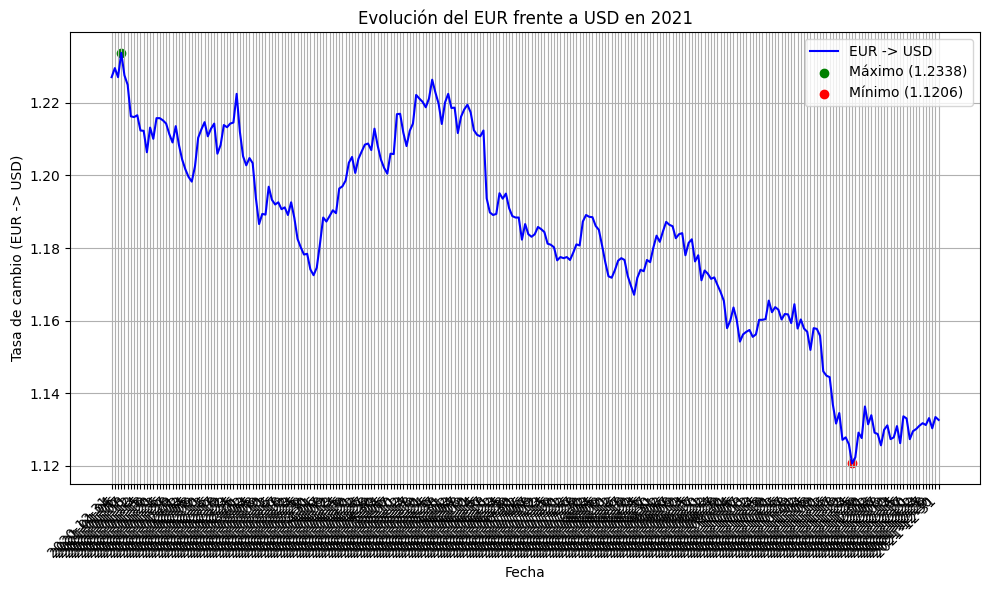

In [12]:
def plot_evolucion_moneda(currency, year):
    
    url = "https://api.frankfurter.app"
    
    date = f"{year}-01-01"
    
    if year != datetime.now().year:
        
        date_ = f"{year}-12-31"
        
        endpoint = f"{url}/{date}..{date_}?to={currency}"
    
    else:
        
        endpoint = f"{url}/{date}..?to={currency}"
        
    print(f"Endpoint: {endpoint}")
    

    response = requests.get(endpoint)
    
    data = response.json()
    
    # Extraer las tasas de cambio y fechas
    rates = data['rates']
    dates = sorted(rates.keys())  # Fechas ordenadas
    values = [rates[date][currency] for date in dates]  # Tasas de cambio para la moneda dada
    
    # Encontrar el máximo y el mínimo
    max_value = max(values)
    min_value = min(values)
    max_date = dates[values.index(max_value)]
    min_date = dates[values.index(min_value)]
    
    # Imprimir los extremos
    print(f"Máximo: {max_value} el {max_date}")
    print(f"Mínimo: {min_value} el {min_date}")
    
    # Graficar la evolución de la moneda
    plt.figure(figsize=(10, 6))
    plt.plot(dates, values, label=f"EUR -> {currency}", color='blue')
    plt.scatter([max_date], [max_value], color='green', label=f"Máximo ({max_value})")
    plt.scatter([min_date], [min_value], color='red', label=f"Mínimo ({min_value})")
    plt.xlabel("Fecha")
    plt.ylabel(f"Tasa de cambio (EUR -> {currency})")
    plt.title(f"Evolución del EUR frente a {currency} en {year}")
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
plot_evolucion_moneda("USD", 2021)
    

### Ejercicio 2:

- Repite el ejercicio 1 pero esta vez agregando al mismo plot tantas monedas como el usuario lo indique. Esta vez no hace falta indicar los máximos y mínimos de cada moneda.

### Ejercicio 3:

- Repite el ejercicio 1 esta vez evaluando la relación de dos monedas que no sean el euro. Muestra el máximo y el mínimo de la relación entre las monedas.